In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv("pitchers.csv")

In [34]:
df = df.replace(False, 0)
df = df.replace(True, 1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [35]:
pitchers_data = df[df.active_player == 0]
pitchers_data = pitchers_data.dropna() # Drops all null values
pitchers_data = pitchers_data[pitchers_data.name != 'Roger Clemens']
pitchers_data = pitchers_data[pitchers_data.name != 'Tommy Lasorda']

<AxesSubplot:xlabel='career_era', ylabel='hall_of_fame'>

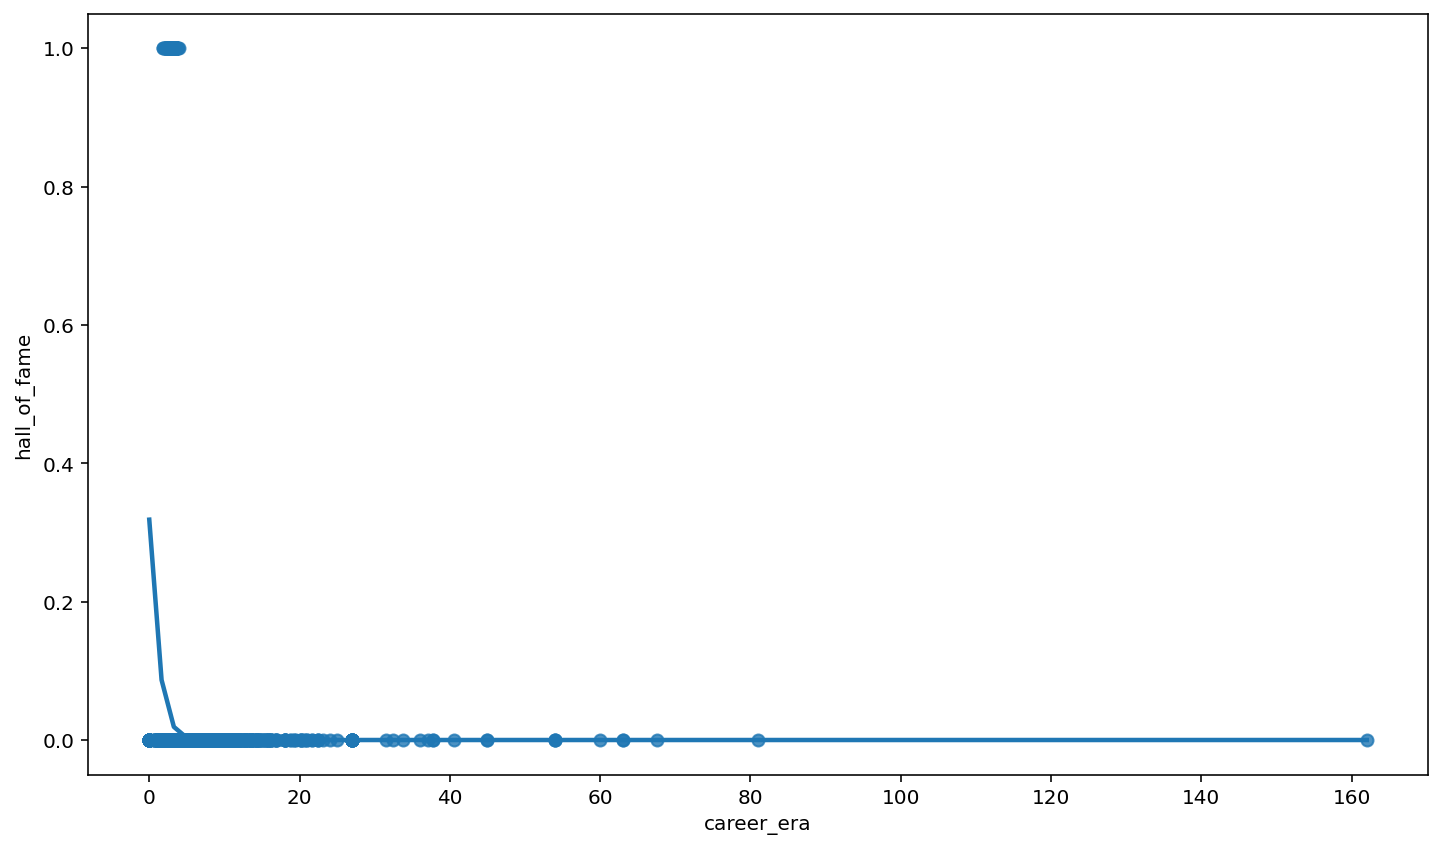

In [36]:
sns.regplot(x=pitchers_data['career_era'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_whip', ylabel='hall_of_fame'>

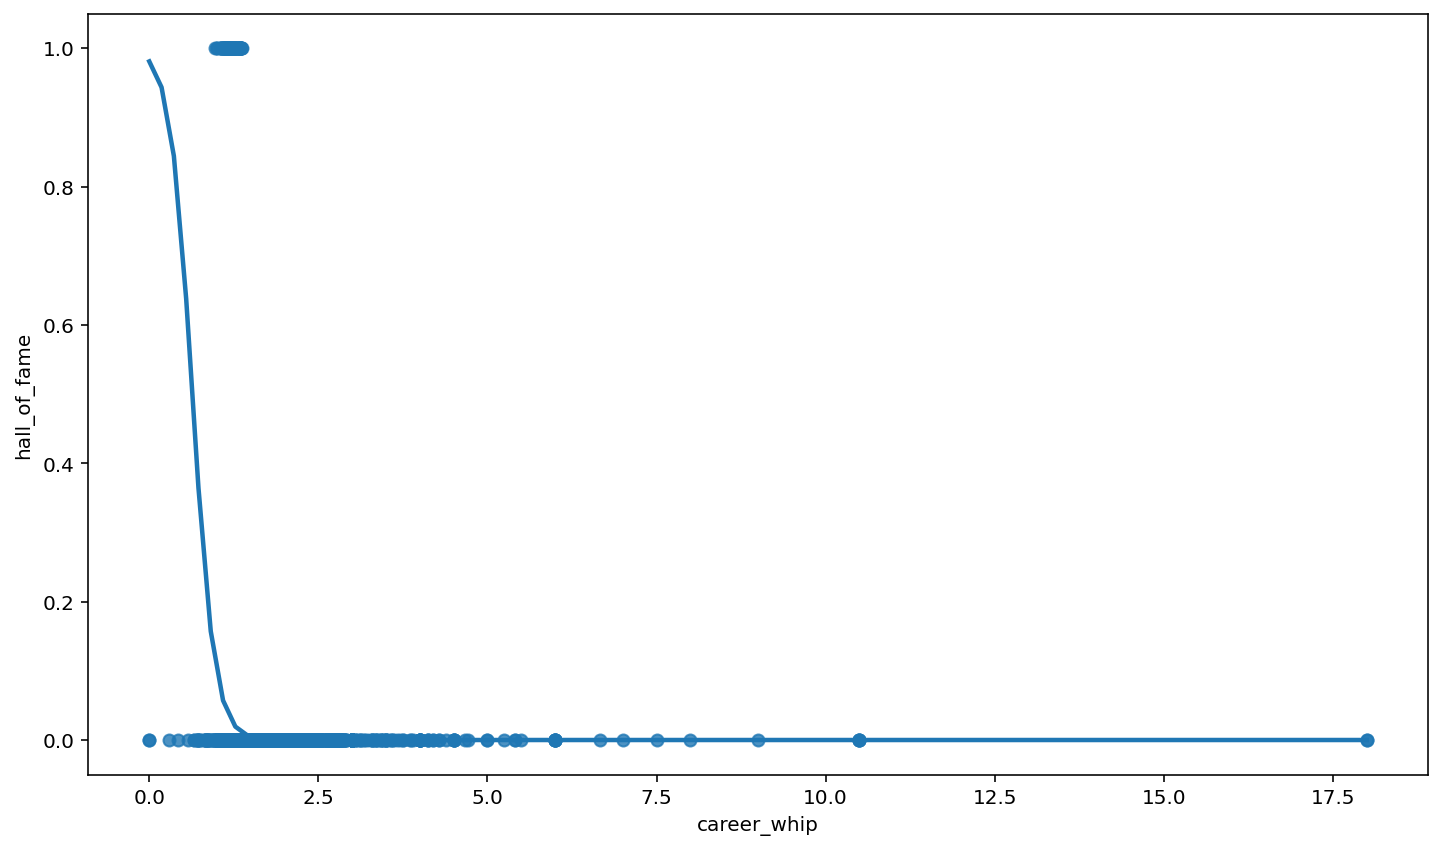

In [37]:
sns.regplot(x=pitchers_data['career_whip'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_ip', ylabel='hall_of_fame'>

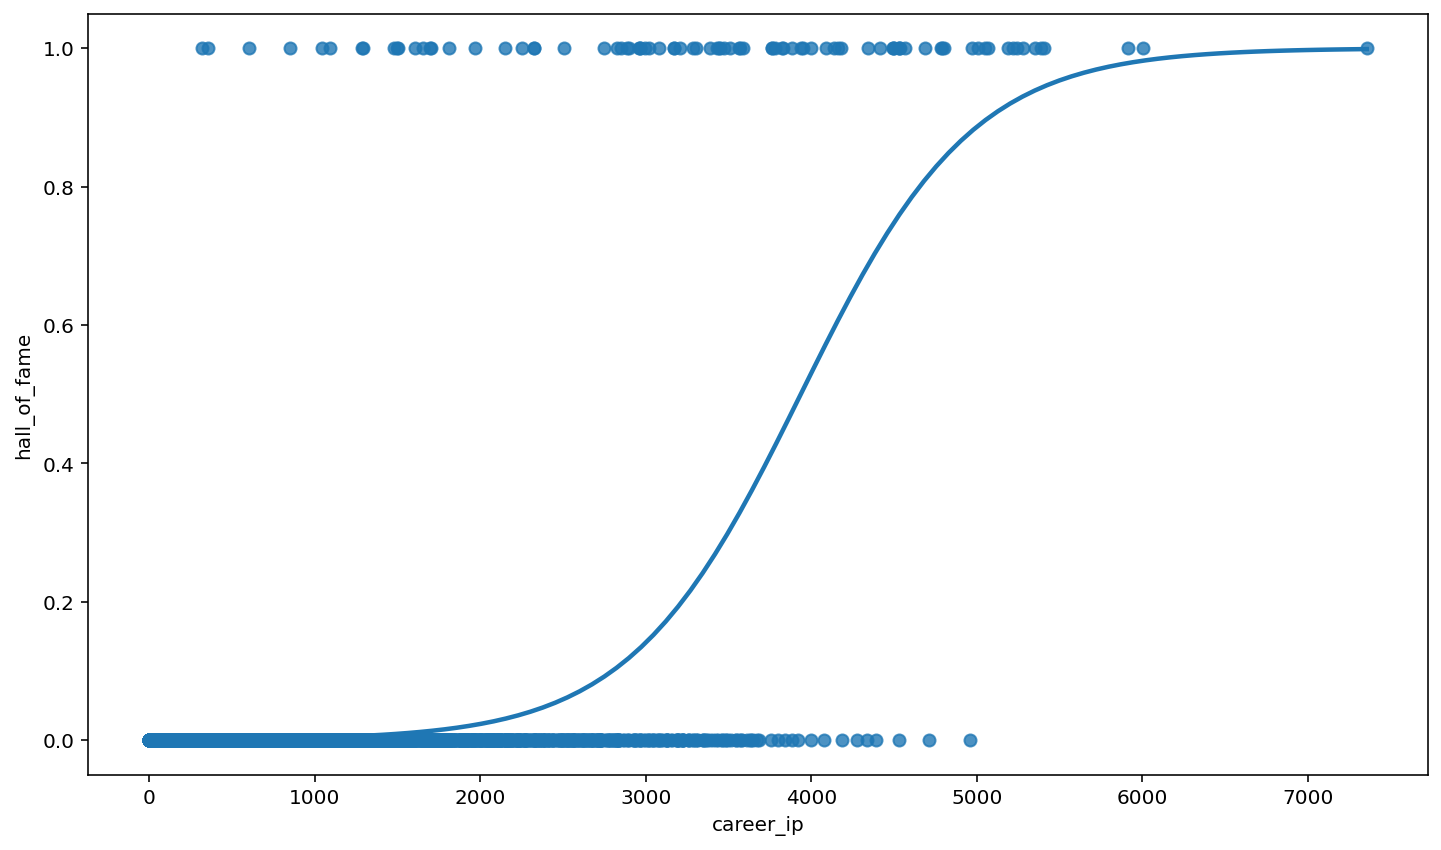

In [38]:
sns.regplot(x=pitchers_data['career_ip'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_wl', ylabel='hall_of_fame'>

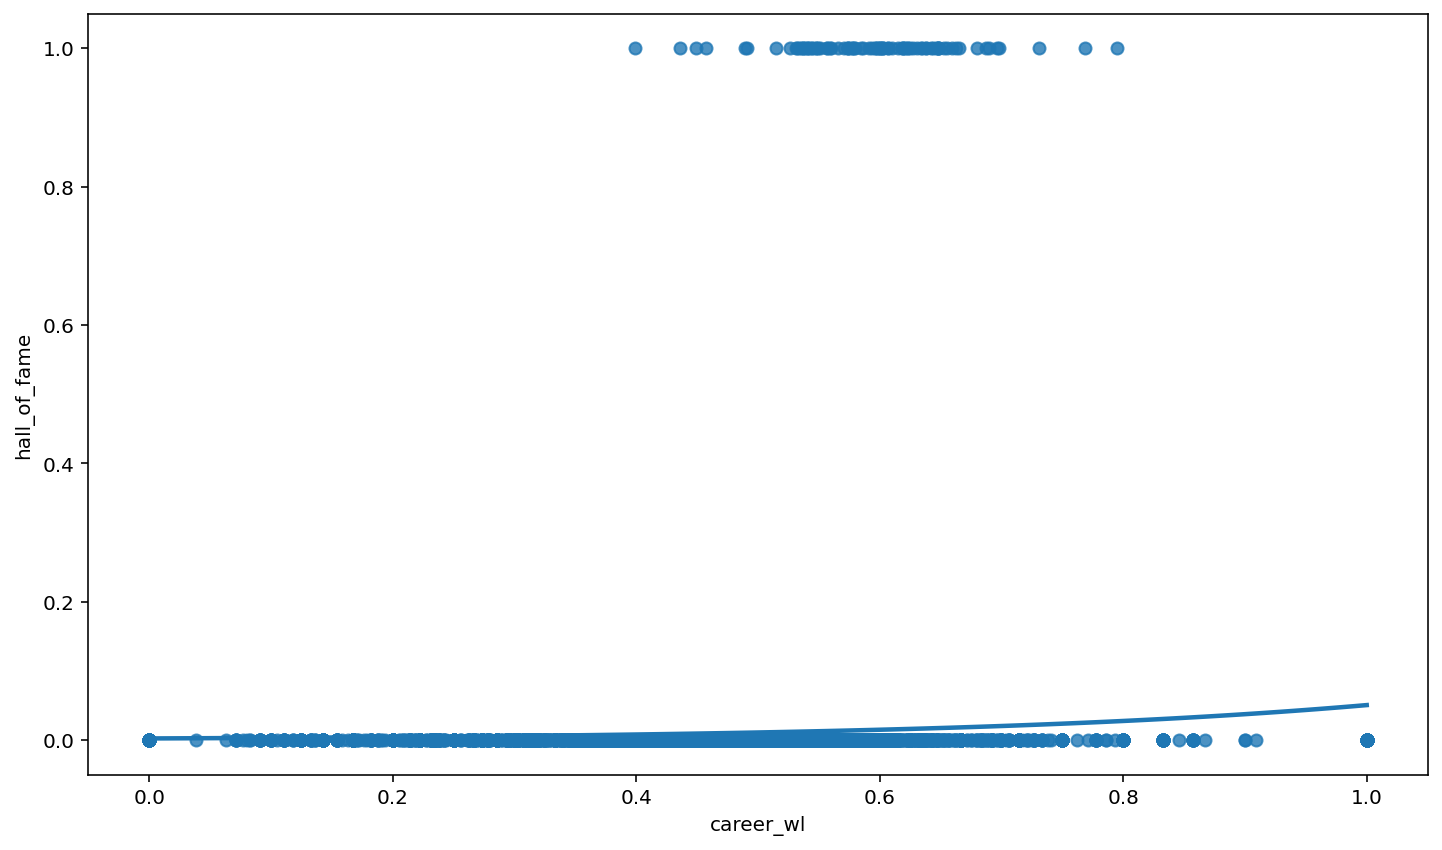

In [39]:
sns.regplot(x=pitchers_data['career_wl'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_wins', ylabel='hall_of_fame'>

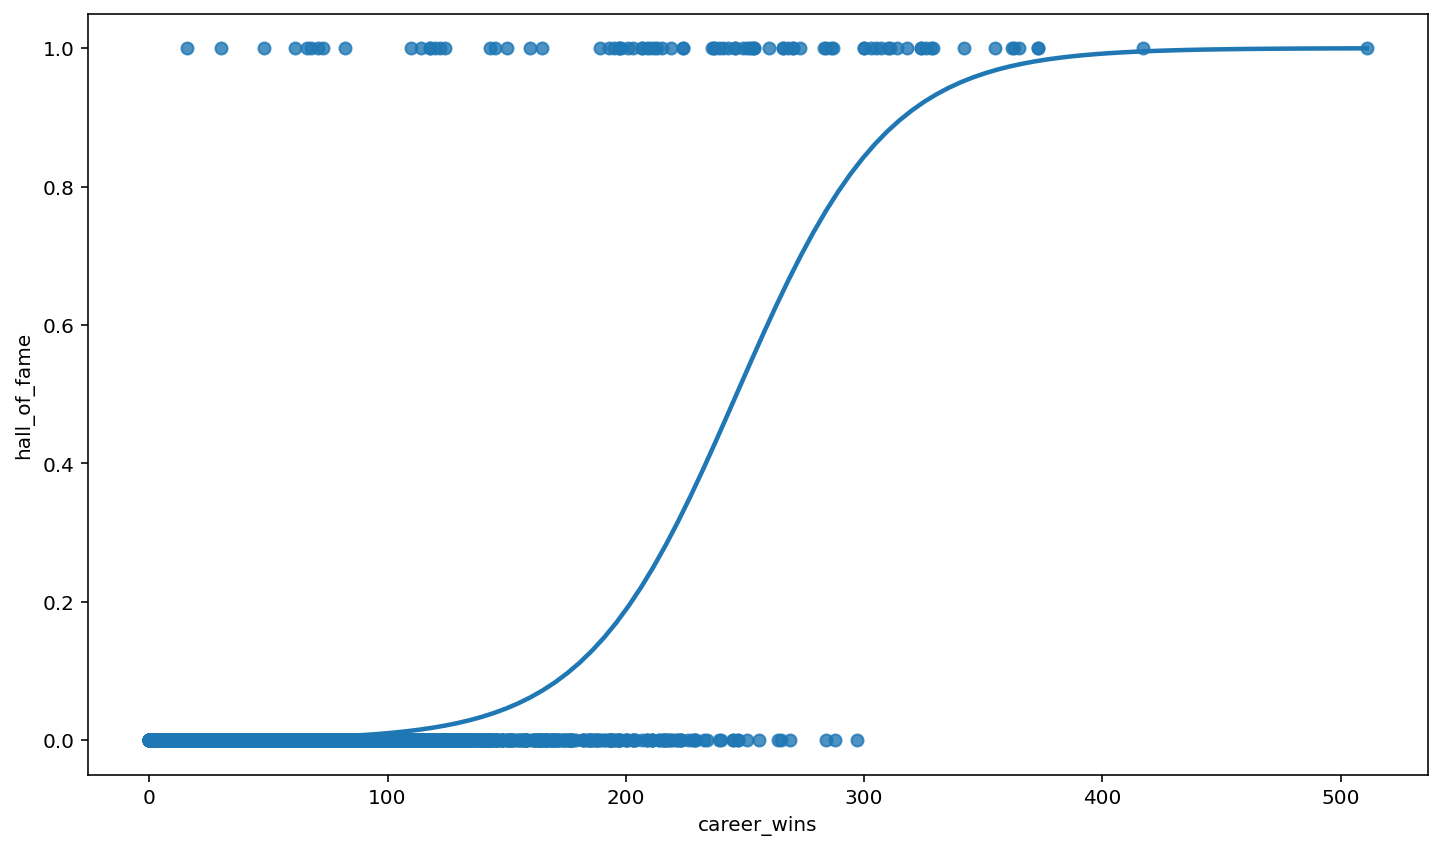

In [40]:
sns.regplot(x=pitchers_data['career_wins'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_so', ylabel='hall_of_fame'>

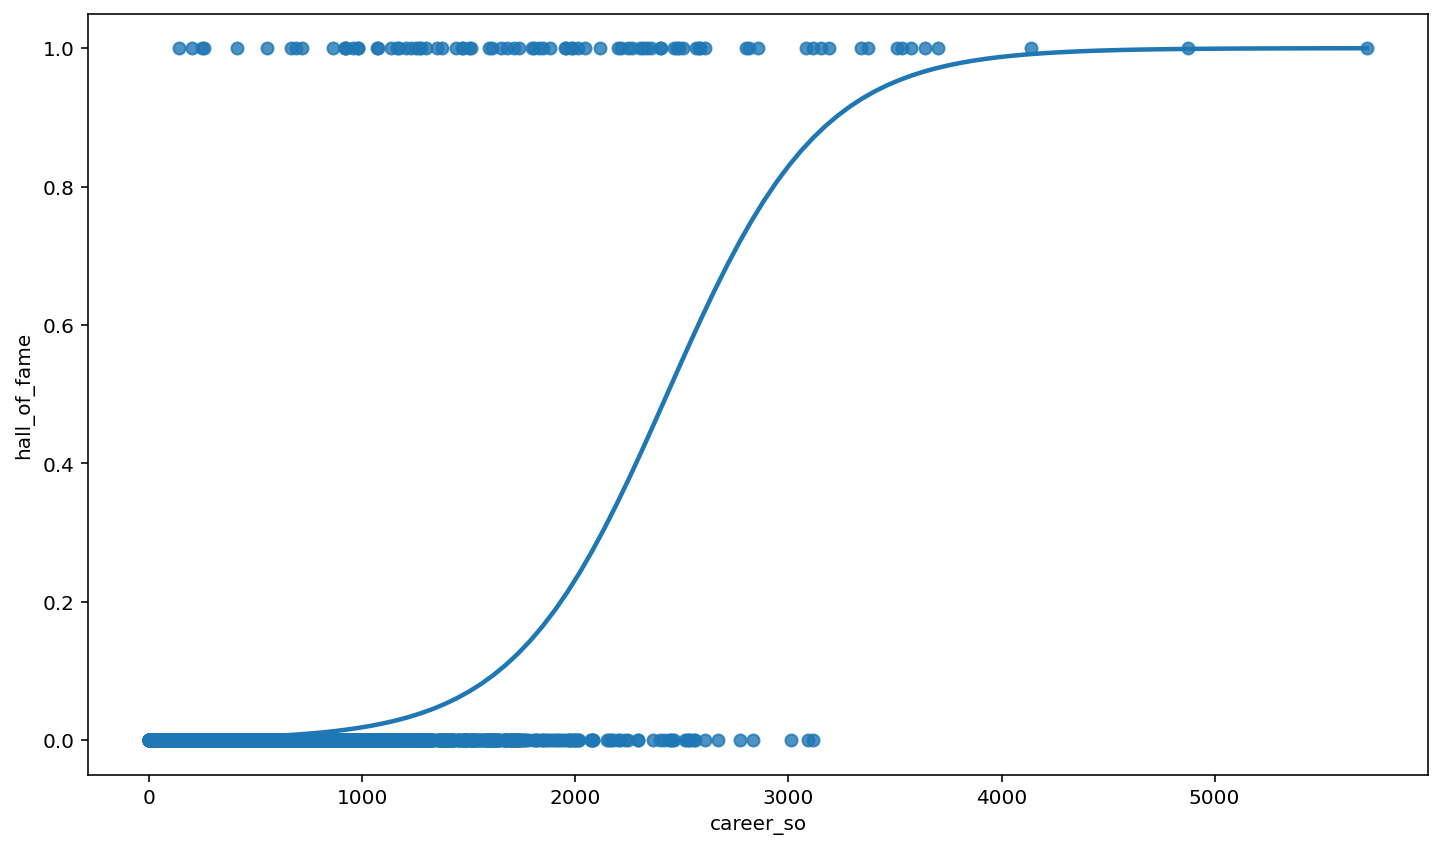

In [41]:
sns.regplot(x=pitchers_data['career_so'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_war', ylabel='hall_of_fame'>

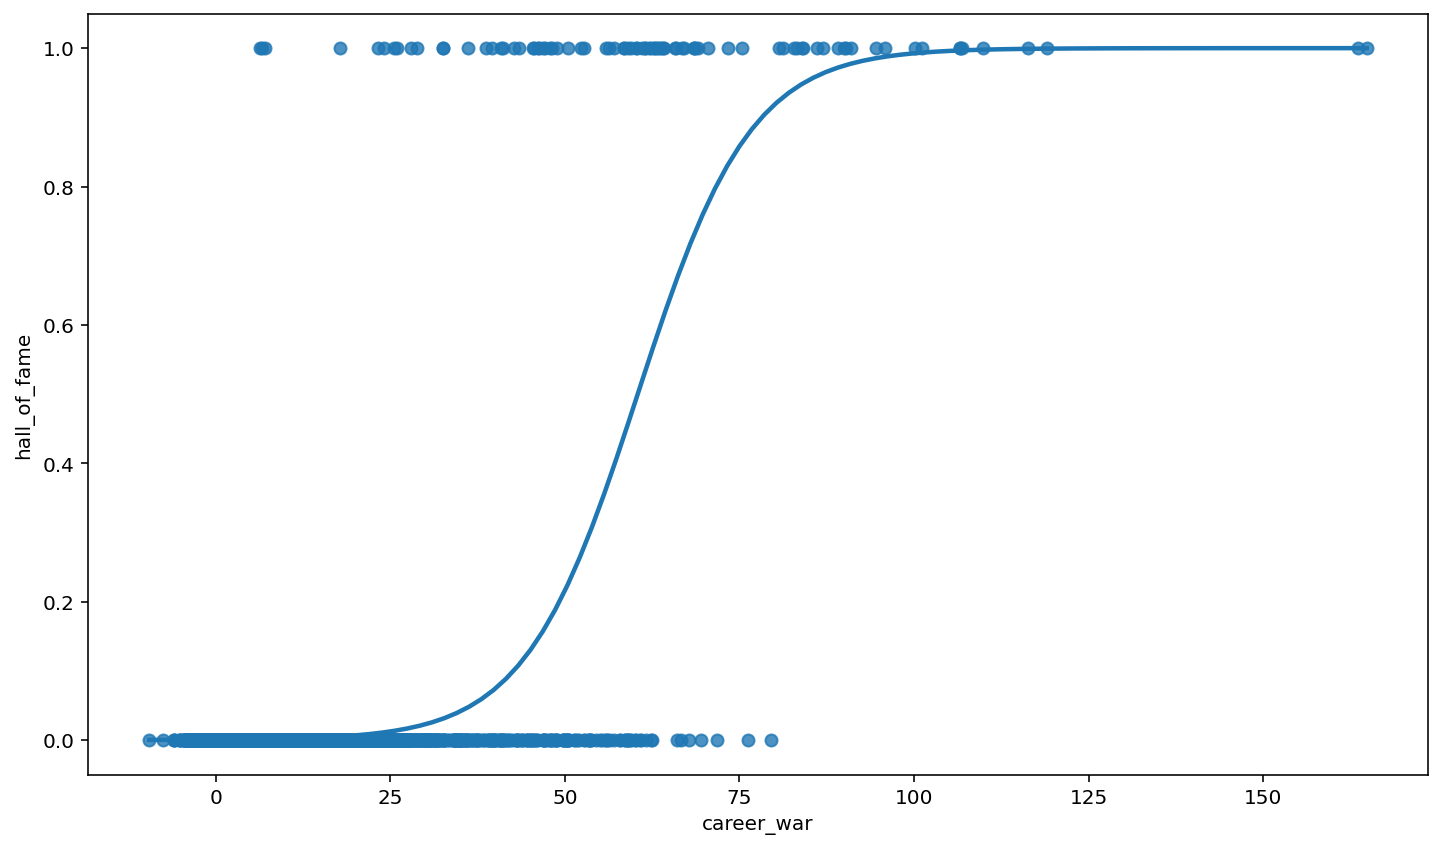

In [42]:
sns.regplot(x=pitchers_data['career_war'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='career_saves', ylabel='hall_of_fame'>

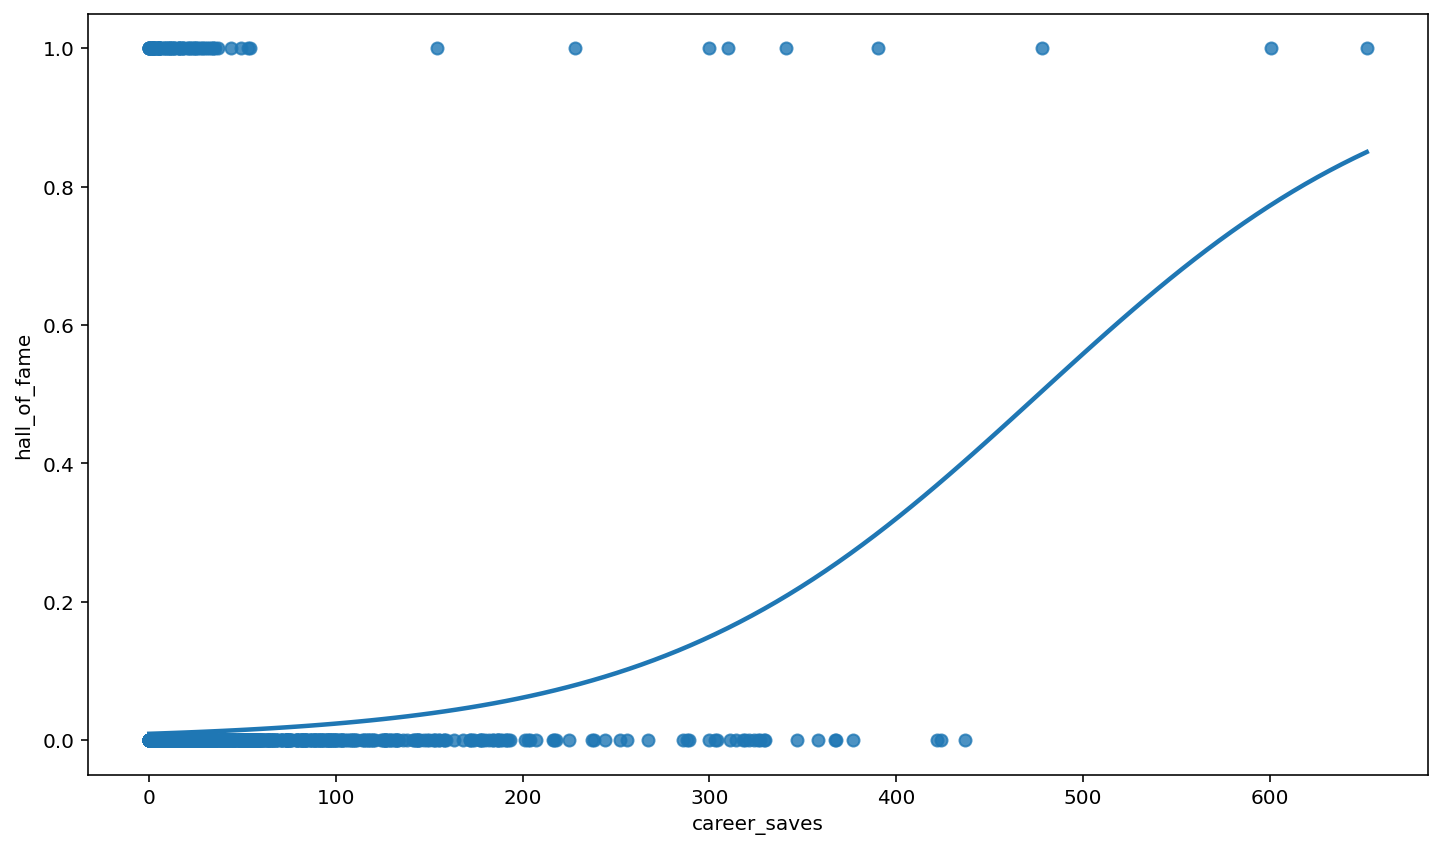

In [43]:
sns.regplot(x=pitchers_data['career_saves'], y=pitchers_data['hall_of_fame'], data=df, logistic=True, ci=None)

In [15]:
pitchers_data = pitchers_data[~pitchers_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [58]:
X = pitchers_data.drop(['hall_of_fame','link','name','active_player'],axis=1)

Y = pitchers_data.hall_of_fame

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train, Y_train)


from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)
score_ = model.score(X_test, Y_test)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
weight = model.coef_ 

print(model.intercept_)

print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')
print('weight', weight, sep = '\n')
print('intercept', model.intercept_, sep = '\n')


[-1.8893136]
y_pred: [0 0 0 ... 0 0 0]

score_: 0.9937264742785445

conf_m:
[[1579    0]
 [  10    5]]

report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1579
           1       1.00      0.33      0.50        15

    accuracy                           0.99      1594
   macro avg       1.00      0.67      0.75      1594
weighted avg       0.99      0.99      0.99      1594

weight
[[ 2.04280396e-03 -1.11580263e+00 -1.93186181e+00 -1.26199742e-03
  -8.93437571e-01  3.77841274e-02 -1.42222228e-03  8.30667170e-02
   8.18862966e-03  3.01172983e-01  2.98289897e-01 -5.13667433e-01
   3.40139732e-01  2.88736832e-01]]
intercept
[-1.8893136]


In [59]:
coeffs = {}
cols = (list(X.columns))
for i in range(len(cols)):
    coeffs[cols[i]] = weight[0][i]
coeffs

{'years_played': 0.0020428039642415513,
 'career_era': -1.1158026287597493,
 'career_whip': -1.9318618093573272,
 'career_ip': -0.0012619974204642326,
 'career_wl': -0.8934375712804276,
 'career_wins': 0.03778412738264687,
 'career_so': -0.0014222222823067736,
 'career_war': 0.0830667170029248,
 'career_saves': 0.00818862965699141,
 'world_series_wins': 0.30117298303976586,
 'cy_young_awards': 0.2982898970935313,
 'mvps': -0.5136674329481301,
 'era_titles': 0.3401397317783753,
 'all_star_apps': 0.28873683194134486}